In [ ]:
# import zipfile

# zip_path = "/content/sample_data/archive.zip"
# extract_path = "/content/sample_data/"

# # Check if the file is a valid zip file
# if zipfile.is_zipfile(zip_path):
#     with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#         zip_ref.extractall(extract_path)
#     print("Extraction completed successfully.")
# else:
#     print("The file is not a valid ZIP file.")

In [ ]:
import zipfile

# Location of the ZIP file
zip_ref = zipfile.ZipFile("/content/archive.zip", 'r')

# Location where we want to extract the files
zip_ref.extractall("/content/")

# Close the ZIP file
zip_ref.close()

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv("/content/drugsComTrain_raw.csv")
test = pd.read_csv("/content/drugsComTest_raw.csv")

print("shape of train:",train.shape)
print("shape of test:",test.shape)

shape of train: (161297, 7)
shape of test: (53766, 7)


In [ ]:
train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:
data = pd.concat([train, test])
data.shape

(215063, 7)

In [ ]:
data.sample(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
6943,214784,Prevpac,Helicobacter Pylori Infection,"""I&#039;m currently on day 11 of Prevpac. I wa...",7,11-Jul-14,41
37705,8108,Zolpidem,Insomnia,"""The first two weeks were great. I was shocke...",8,7-Nov-17,1
147178,159159,TriNessa,Birth Control,"""My Gyno prescribed me Trinessa since I had be...",10,6-Dec-14,17
99320,130136,Levonorgestrel,Abnormal Uterine Bleeding,"""I had my Mirena inserted exactly a year ago a...",7,4-Sep-14,39
12322,177667,Duloxetine,Anxiety,"""I have GAD, tried celexa, worked for a while,...",10,10-Apr-15,76
12132,62056,Citalopram,Anxiety and Stress,"""I have suffered from panic attacks for about ...",7,18-Dec-14,49
142560,19567,Pregabalin,Generalized Anxiety Disorde,"""Have been rock bottom down by the river, then...",10,16-Jun-13,176
121262,1954,Polyethylene glycol 3350,Constipation,"""I had been constipated for as long as I could...",10,16-May-12,124
1434,71256,Pramosone,Dermatitis,"""I have eczema, which is a form of dermatitis....",9,22-Oct-08,5
40492,156607,Dulaglutide,"Diabetes, Type 2","""I started taking trulicity last Monday. Once...",1,3-Mar-17,18


In [ ]:
data.describe()

,uniqueID,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [ ]:
data.isnull().any()

uniqueID       False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

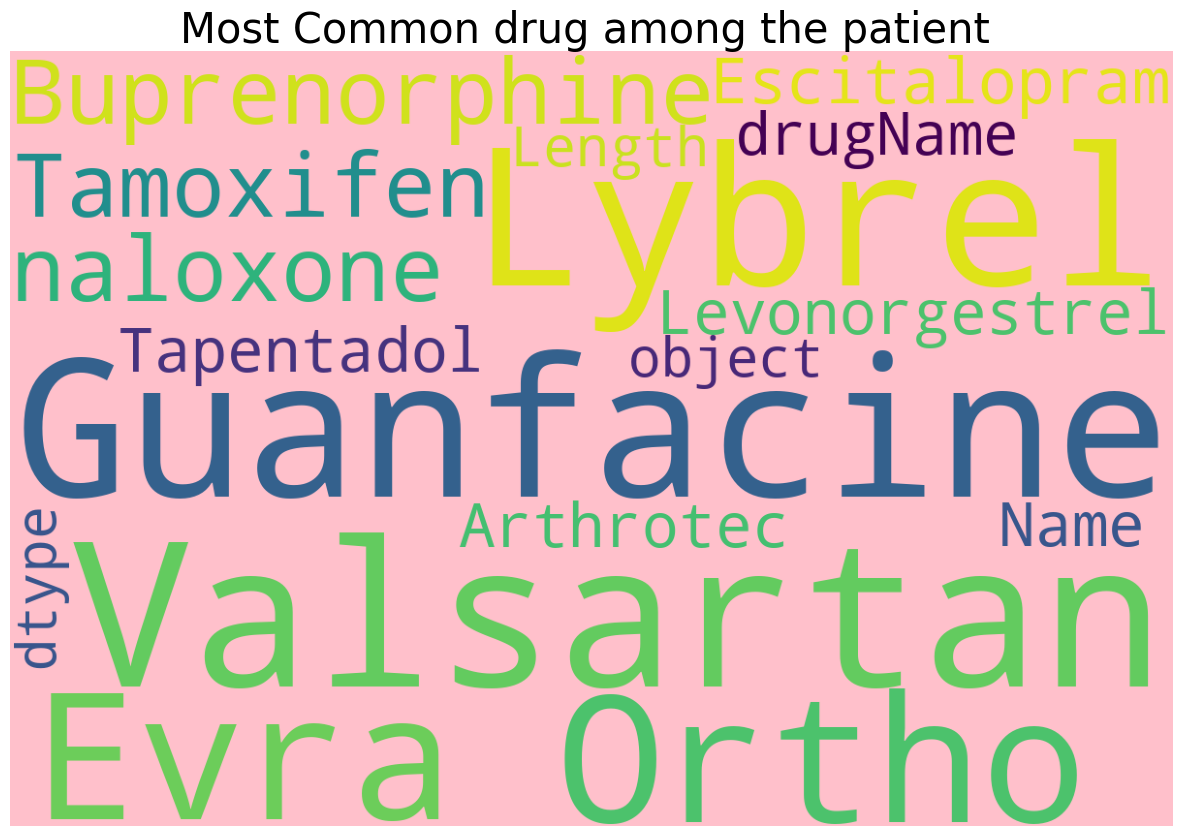

In [ ]:
stopwords= set(STOPWORDS)
wordcloud =  WordCloud(background_color = "pink", stopwords = stopwords, max_words = 100, width = 1200, height = 800).generate(str(data['drugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title("Most Common drug among the patient ", fontsize = 30)
plt.imshow(wordcloud)
plt.axis("off")
plt.imshow(wordcloud)
plt.show()


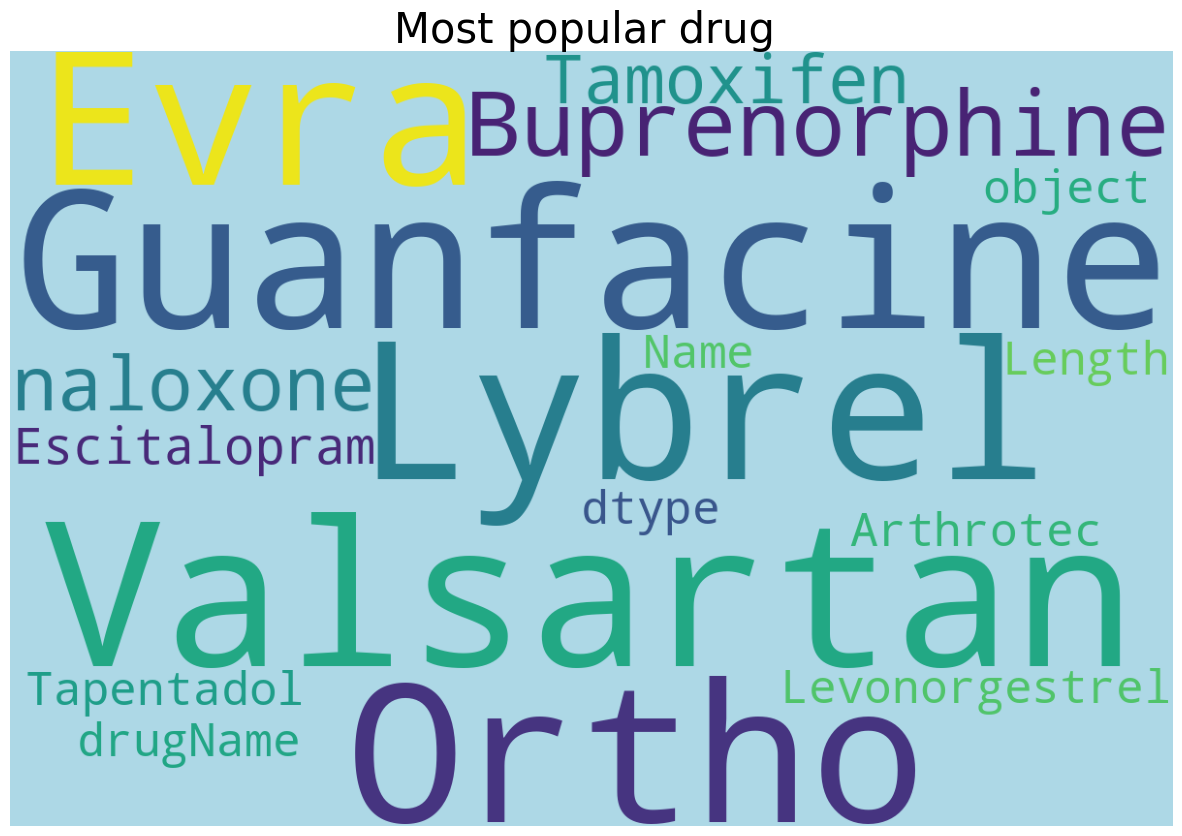

In [ ]:
stopwords= set(STOPWORDS)
wordcloud =  WordCloud(background_color = "lightblue", stopwords = stopwords, max_words = 100, width = 1200, height = 800).generate(str(data['drugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title("Most popular drug ", fontsize = 30)
plt.imshow(wordcloud)
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

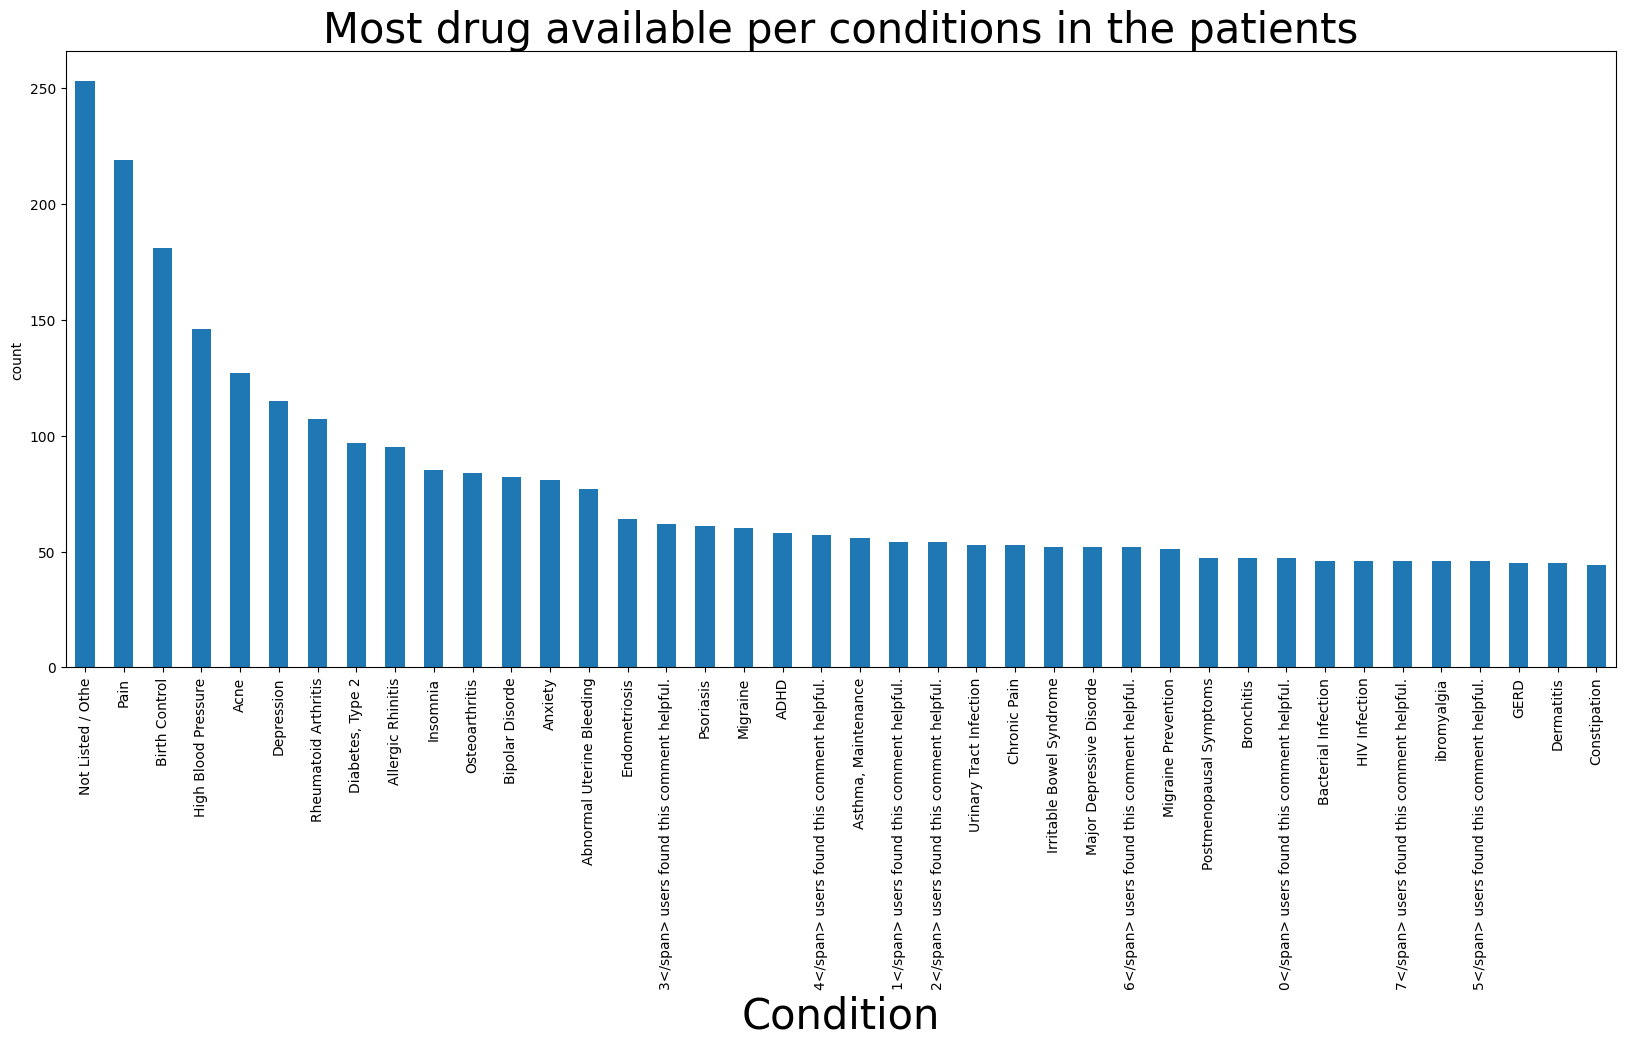

In [ ]:
data.groupby(["condition"])['drugName'].nunique().sort_values(ascending = False).head(40).plot.bar(figsize = (20,8))
plt.title("Most drug available per conditions in the patients" , fontsize = 30)
plt.xlabel("Condition" , fontsize = 30)
plt.ylabel('count')
plt.show()

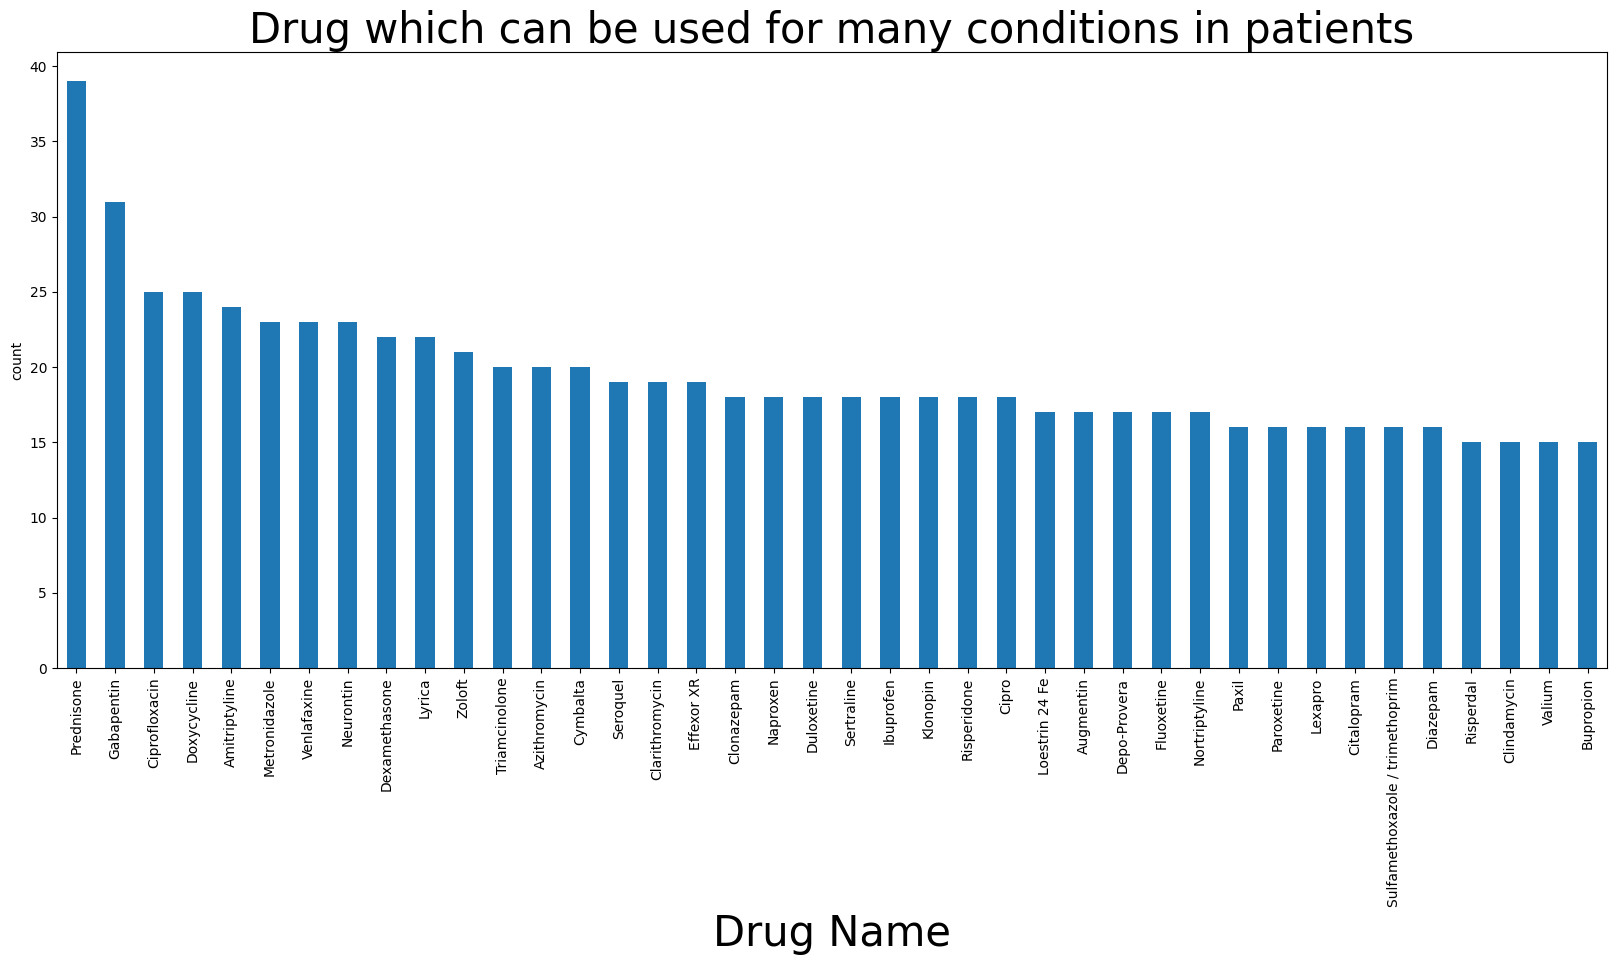

In [ ]:
data.groupby(['drugName'])['condition'].nunique().sort_values(ascending = False).head(40).plot.bar(figsize = (20,8))
plt.title("Drug which can be used for many conditions in patients", fontsize = 30)
plt.xlabel("Drug Name", fontsize = 30)
plt.ylabel('count')
plt.show()

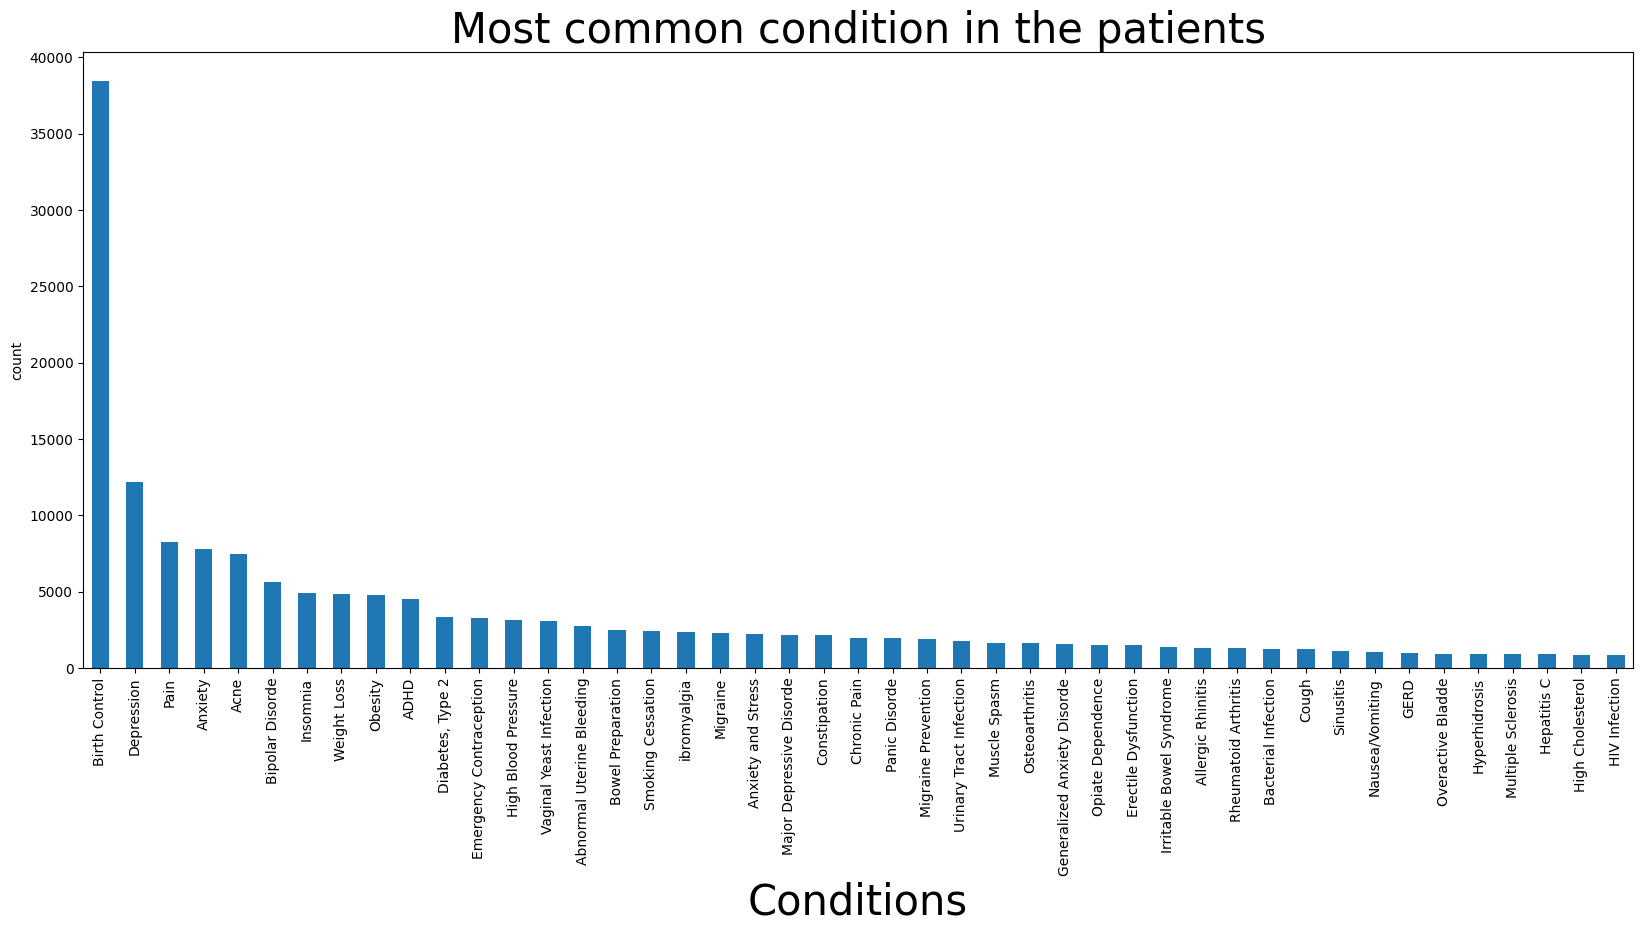

In [ ]:
data['condition'] .value_counts().head(45).plot.bar(figsize =(20, 8))
plt.title("Most common condition in the patients", fontsize = 30)
plt.xlabel("Conditions", fontsize = 30)
plt.ylabel('count')
plt.show()

In [ ]:
train['review'][100]

'"Awful medicine, the worst. The side effects outweigh the benefit.  Headache the first night, leg and back pain, Sensitive skin,  just awful. Pain got worse and worse. I changed my meds to ciproflaxcin. I have used this in the past so hopefully, it will continue to help. I even questioned the doc at urgent care to see if I can take cipro and she offered macrobid. Maybe this urgent care and this medication is something they get a deal on....stay away from macrobid."'

In [ ]:
data["rating"].value_counts()

rating
10    68005
9     36708
1     28918
8     25046
7     12547
5     10723
2      9265
3      8718
6      8462
4      6671
Name: count, dtype: int64

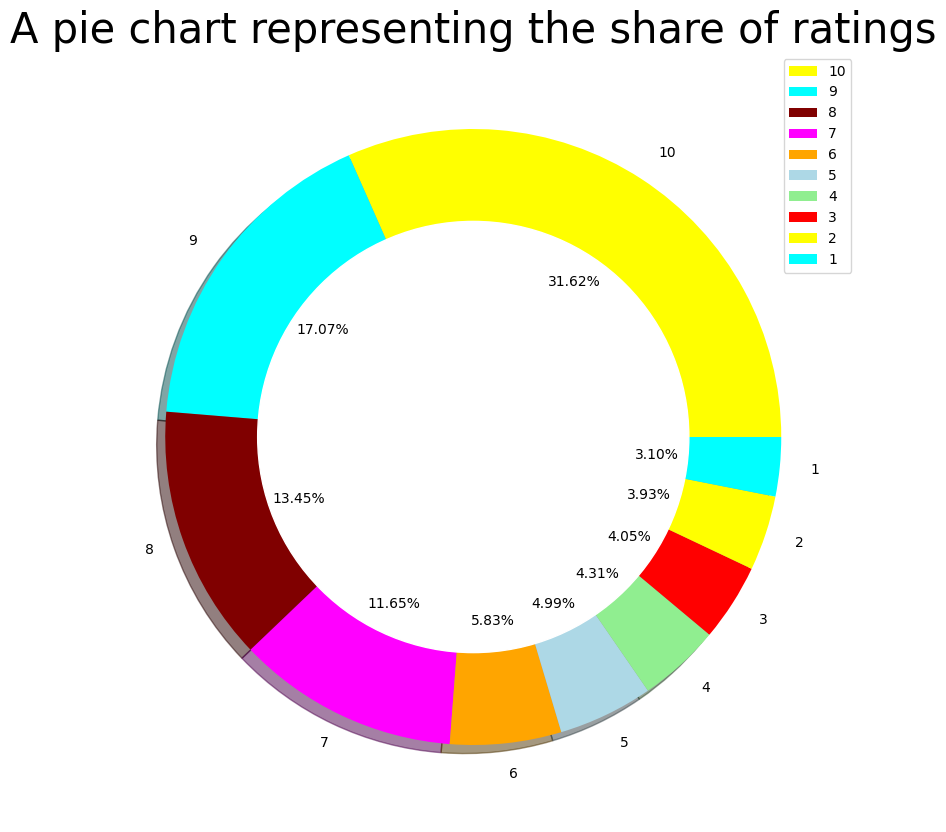

In [ ]:
size = [68005,36708,28918, 25046,12547, 10723, 9265,8718, 8462,6671]
colors = ['yellow','cyan','maroon','magenta','orange','lightblue','lightgreen','red']
labels = "10","9","8","7","6","5","4","3","2","1"

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, shadow = True, autopct = '%.2f%%')
plt.axis("off")
plt.title("A pie chart representing the share of ratings", fontsize = 30)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Convert the 'date' column to datetime without specifying the format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Extract year, month, and day into separate columns
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day


<ipython-input-21-74526ae6f6ac>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'], errors='coerce')


In [ ]:
!pip install --extra-index-url=https://pypi.nvidia.com cudf-cu11

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com


In [ ]:
import cudf
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is a pandas DataFrame and you have RAPIDS installed
gdf = cudf.DataFrame.from_pandas(data)

# Compute the count of reviews per year using GPU
count_data = gdf['year'].value_counts().sort_index().to_pandas()

# Setting the size of the plot
plt.rcParams["figure.figsize"] = (15, 8)

# Creating the count plot
sns.barplot(x=count_data.index, y=count_data.values, palette='dark')

# Adding title and labels
plt.title("Number of reviews per year", fontsize=30)
plt.xlabel("Year", fontsize=30)
plt.ylabel("Count of reviews", fontsize=15)

# Displaying the plot
plt.show()



ERROR:ptxcompiler.patch:Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
/usr/local/lib/python3.10/dist-packages/cupy/_environment.py:487: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environm

CUDARuntimeError: cudaErrorInsufficientDriver: CUDA driver version is insufficient for CUDA runtime version